In [5]:
import torch
from utils import LQR_2D_true_solution, LQR_1D_true_solution, true_V_eval_2D
from bases import bases_poly, d_bases_poly, sec_bases_poly, bases_2d, bases_poly_2D_simp, d_bases_poly_2D_simp, sec_d_bases_poly_2D_simp, bases_poly_2D_s_a_simp
from main_phibe import phibe_finder_1D_LQR, phibe_finder_2D_LQR
from main_RL import RL_finder_1D_LQR, RL_finder_2D_LQR
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [6]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [7]:
def reward(s, a):
    return - Q * (s**2) - R * (a**2)

In [8]:
A = -1.0
B = 0.5
sig = 0.
R = 1
Q = 1
S = 0
beta = 1
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q,}
true_b, True_V = LQR_1D_true_solution(A, B, Q, R, sig, beta)
print(true_b, True_V)

-0.16227766016837952 tensor([-0.0000,  0.0000, -0.3246])


In [9]:
b_init = 0.5
c_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1., 1.]).to(device)

In [10]:
num_traj = 30

In [11]:
V_exact_dist_total_1st = torch.zeros(num_traj, 6)
V_exact_dist_total_2nd = torch.zeros(num_traj, 6)
V_exact_dist_total_RL = torch.zeros(num_traj, 6)

In [12]:
bd_low_s = -1.
bd_upper_s = 1.
bd_low_b = -1.
bd_upper_b = 1.
bd_low_c = -1.
bd_upper_c = 1.
bd_low_a = -1.
bd_upper_a = 1.
num_iter = 30
GD_num_iter = 30
I = 4
lr = 1
batch_size = int(1e6)
reward = reward
bases_V = bases_poly
d_bases_V = d_bases_poly
sec_d_bases_V = sec_bases_poly
bases_Q = bases_2d
true_V=True_V
simp_basis = False
deterministic = True

In [13]:
for traj_idx in range(num_traj):
    print(f'running experiment round {traj_idx}')
    V_exact_dist_final_1st = []
    V_exact_dist_final_2nd = []
    V_exact_dist_final_RL = []

    for dt in [5 * 1e-3, 1e-2, 5 * 1e-2, 1e-1, 1, 2.5]:
        b_init = 0.5
        c_init = 0.5
        Q_init = 0.5 * torch.tensor([1., 1., 1., 1., 1., 1.]).to(device)
        b1, V_exact_dist_1, _ = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, int(batch_size / I), int(batch_size / I), I, lr, dt, 1, 
                                                                                     true_V, info_true)

        b_init = 0.5
        c_init = 0.5
        Q_init = 0.5 * torch.tensor([1., 1., 1., 1., 1., 1.]).to(device)
        b2, V_exact_dist_2, _ = phibe_finder_1D_LQR(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis,
                                                                                     bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, int(batch_size / I), int(batch_size / I), I, lr, dt, 2, 
                                                                                     true_V, info_true)

        b_init = 0.5
        c_init = 0.5
        Q_init = 0.5 * torch.tensor([1., 1., 1., 1., 1., 1.]).to(device)
        b_val_RL, V_exact_dist_RL = RL_finder_1D_LQR(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, False, bases_Q, num_iter, int(batch_size / I), I, dt, true_V, info_true)

        V_exact_dist_final_1st.append(torch.abs(torch.tensor(b1, dtype=torch.float64)[-5:].mean() - true_b))
        V_exact_dist_final_2nd.append(torch.abs(torch.tensor(b2, dtype=torch.float64)[-5:].mean() - true_b))
        V_exact_dist_final_RL.append(torch.abs(torch.tensor(b_val_RL, dtype=torch.float64)[-5:].mean() - true_b))


    V_exact_dist_total_2nd[traj_idx, :] = torch.tensor(V_exact_dist_final_2nd, dtype=torch.float64)
    V_exact_dist_total_1st[traj_idx, :] = torch.tensor(V_exact_dist_final_1st, dtype=torch.float64)
    V_exact_dist_total_RL[traj_idx, :] = torch.tensor(V_exact_dist_final_RL, dtype=torch.float64)

running experiment round 0


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.67it/s]


running experiment round 1


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.43it/s]


running experiment round 2


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.01it/s]


running experiment round 3


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 25.50it/s]


running experiment round 4


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.24it/s]


running experiment round 5


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.88it/s]


running experiment round 6


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.25it/s]


running experiment round 7


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.56it/s]


running experiment round 8


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.38it/s]


running experiment round 9


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.66it/s]


running experiment round 10


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 25.79it/s]


running experiment round 11


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.06it/s]


running experiment round 12


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.77it/s]


running experiment round 13


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.97it/s]


running experiment round 14


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 21.47it/s]


running experiment round 15


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.28it/s]


running experiment round 16


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.02it/s]


running experiment round 17


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 27.76it/s]


running experiment round 18


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 23.04it/s]


running experiment round 19


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.24it/s]


running experiment round 20


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 20.89it/s]


running experiment round 21


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.98it/s]


running experiment round 22


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 26.75it/s]


running experiment round 23


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 25.13it/s]


running experiment round 24


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 23.01it/s]


running experiment round 25


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 21.98it/s]


running experiment round 26


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 23.04it/s]


running experiment round 27


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 21.45it/s]


running experiment round 28


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 22.83it/s]


running experiment round 29


Running Optimal BE PI: 100%|██████████| 30/30 [00:01<00:00, 23.03it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


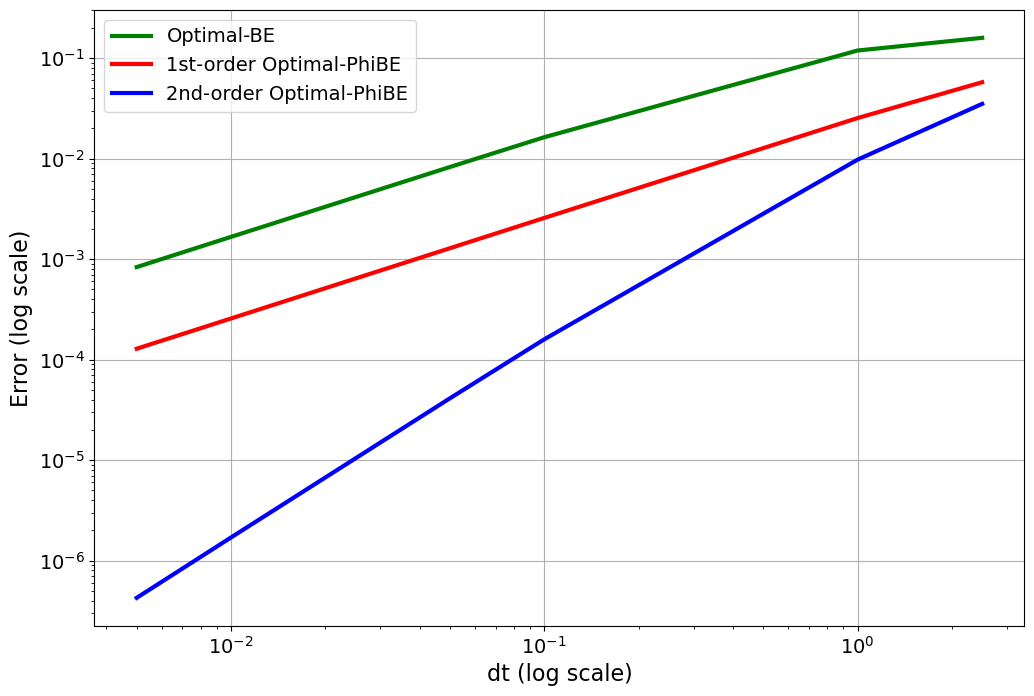

In [14]:
trajectories_RL = V_exact_dist_total_RL[:, :]
trajectories_2nd = V_exact_dist_total_2nd[:, :]
trajectories_1st = V_exact_dist_total_1st[:, :]

trajectories_np_RL = trajectories_RL.numpy()
trajectories_np_2nd = trajectories_2nd.numpy()
trajectories_np_1st = trajectories_1st.numpy()

x_values = [5 * 1e-3, 1e-2, 5 * 1e-2, 1e-1, 1, 2.5]

min_trajectory_RL = trajectories_np_RL.min(axis=0)
max_trajectory_RL = trajectories_np_RL.max(axis=0)
mean_trajectory_RL = trajectories_np_RL.mean(axis=0)

min_trajectory_1st = trajectories_np_1st.min(axis=0)
max_trajectory_1st = trajectories_np_1st.max(axis=0)
mean_trajectory_1st = trajectories_np_1st.mean(axis=0)

min_trajectory_2nd = trajectories_np_2nd.min(axis=0)
max_trajectory_2nd = trajectories_np_2nd.max(axis=0)
mean_trajectory_2nd = trajectories_np_2nd.mean(axis=0)

plt.figure(figsize=(12, 8))

plt.loglog(x_values, mean_trajectory_RL, color='green', linewidth=3, label='Optimal-BE')
plt.loglog(x_values, mean_trajectory_1st, color='red', linewidth=3, label='1st-order Optimal-PhiBE')
plt.loglog(x_values, mean_trajectory_2nd, color='blue', linewidth=3, label='2nd-order Optimal-PhiBE')

plt.xlabel('dt (log scale)', fontsize=16)
plt.ylabel('Error (log scale)', fontsize=16)

plt.legend(fontsize=14)

plt.grid(True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("LQR/dt/dt_1d.eps", format='eps')
plt.show()

In [15]:
def reward(traj_mat, act_mat):
    # traj_mat shape: (m, I, dim)
    # act_mat shape: (m, I, dim)
    # output shape: (m, I, 1)
    r_1 = torch.einsum("ijk,kl,ijl->ij", traj_mat, Q, traj_mat)
    r_2 = torch.einsum("ijk,kl,ijl->ij", act_mat, R, act_mat)
    return (- r_1 - r_2).unsqueeze(-1)

In [16]:
beta = 10.
sig = 0.
A = torch.tensor([[-9.3750, -3.1250], [-3.1250, -9.3750]])
B = torch.tensor([[10., 1.], [1., 10.1]])
Q = torch.tensor([[10., 2.], [2., 10.4]])
R = torch.tensor([[12., 3.], [3., 8.]])

In [25]:
true_b, true_c, True_V = LQR_2D_true_solution(A, B, sig, Q, R, beta)
b_init = true_b + torch.randn(2, 2)
Q_init = 4. * torch.rand(10) - 2.
V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)

In [26]:
true_b

tensor([[-0.2794,  0.0770],
        [ 0.0600, -0.4266]])

In [27]:
True_V

tensor([ 0.0000, -0.3146, -0.0082, -0.3169])

In [28]:
V_init

tensor([ 0.0000, -0.3903, -0.1569, -0.4616])

In [29]:
bd_low_s = -2
bd_upper_s = 2
bd_low_b = -2
bd_upper_b = 2
reward = reward
bases_V = bases_poly_2D_simp
d_bases_V = d_bases_poly_2D_simp
sec_d_bases_V = sec_d_bases_poly_2D_simp
bases_Q = bases_poly_2D_s_a_simp
num_iter = 15
GD_num_iter = 75
m=int(1e4)
m_Q=int(1e4)
I=6
I_Q=6
lr=0.1
true_V = True_V
info_true = {"A":A, "B":B, "sig":sig, "R":R, "Q":Q}
simp_basis = True
deterministic = True

In [30]:
num_traj = 30

In [31]:
V_exact_dist_total_1st = torch.zeros(num_traj, 6)
V_exact_dist_total_2nd = torch.zeros(num_traj, 6)
V_exact_dist_total_RL = torch.zeros(num_traj, 6)

In [32]:
for traj_idx in range(num_traj):
    print(f'running experiment round {traj_idx}')
    V_exact_dist_final_1st = []
    V_exact_dist_final_2nd = []
    V_exact_dist_final_RL = []

    for dt in [5 * 1e-3, 1e-2, 5 * 1e-2, 1e-1, 1, 2.5]:
        V_init = true_V_eval_2D(A, B, b_init, R, Q, beta, sig)
        b1, V_exact_dist_1, _ = phibe_finder_2D_LQR(beta, b_init[:, :], Q_init[:], bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, 1, true_V, info_true)
        b2, V_exact_dist_2, _ = phibe_finder_2D_LQR(beta, b_init[:, :], Q_init[:], bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, simp_basis, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, deterministic, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, 2, true_V, info_true)

        b_val_RL, V_exact_dist_RL = RL_finder_2D_LQR(beta, b_init[:, :], bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, simp_basis, bases_Q, num_iter, I, m_Q, dt, true_V, info_true)

        V_exact_dist_final_1st.append(torch.norm(b1[-1] - true_b))
        V_exact_dist_final_2nd.append(torch.norm(b2[-1] - true_b))
        V_exact_dist_final_RL.append(torch.norm(b_val_RL[-1] - true_b))


    V_exact_dist_total_2nd[traj_idx, :] = torch.tensor(V_exact_dist_final_2nd, dtype=torch.float64)
    V_exact_dist_total_1st[traj_idx, :] = torch.tensor(V_exact_dist_final_1st, dtype=torch.float64)
    V_exact_dist_total_RL[traj_idx, :] = torch.tensor(V_exact_dist_final_RL, dtype=torch.float64)

running experiment round 0


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.38it/s]


running experiment round 1


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.36it/s]


running experiment round 2


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.37it/s]


running experiment round 3


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.01it/s]


running experiment round 4


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.17it/s]


running experiment round 5


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.43it/s]


running experiment round 6


Running Optimal BE PI:  93%|█████████▎| 14/15 [00:02<00:00,  5.63it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 11.46it/s]


running experiment round 7


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 10.84it/s]


running experiment round 8


Running Optimal Phibe of order 1 using Galerkin:  40%|████      | 6/15 [00:01<00:01,  5.53it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.42it/s]


running experiment round 9


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.30it/s]


running experiment round 10


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.39it/s]


running experiment round 11


Running Optimal BE PI: 100%|██████████| 15/15 [00:00<00:00, 15.41it/s]


running experiment round 12


Running Optimal Phibe of order 1 using Galerkin:  20%|██        | 3/15 [00:00<00:02,  5.44it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 11.77it/s]


running experiment round 13


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 13.97it/s]


running experiment round 14


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.58it/s]


running experiment round 15


Running Optimal Phibe of order 1 using Galerkin:  27%|██▋       | 4/15 [00:00<00:02,  5.27it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.12it/s]


running experiment round 16


Running Optimal Phibe of order 2 using Galerkin:  67%|██████▋   | 10/15 [00:01<00:00,  5.26it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.27it/s]


running experiment round 17


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.55it/s]


running experiment round 18


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.49it/s]


running experiment round 19


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 13.42it/s]


running experiment round 20


Running Optimal Phibe of order 1 using Galerkin:  53%|█████▎    | 8/15 [00:01<00:01,  5.19it/s]

infeasibility detected


Running Optimal Phibe of order 1 using Galerkin:  73%|███████▎  | 11/15 [00:02<00:00,  5.02it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.58it/s]


running experiment round 21


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.28it/s]


running experiment round 22


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.33it/s]


running experiment round 23


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 11.71it/s]


running experiment round 24


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 14.28it/s]


running experiment round 25


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 12.53it/s]


running experiment round 26


Running Optimal Phibe of order 1 using Galerkin:  47%|████▋     | 7/15 [00:01<00:01,  5.18it/s]

infeasibility detected


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 13.41it/s]


running experiment round 27


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00,  9.80it/s]


running experiment round 28


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 13.71it/s]


running experiment round 29


Running Optimal BE PI: 100%|██████████| 15/15 [00:01<00:00, 13.82it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


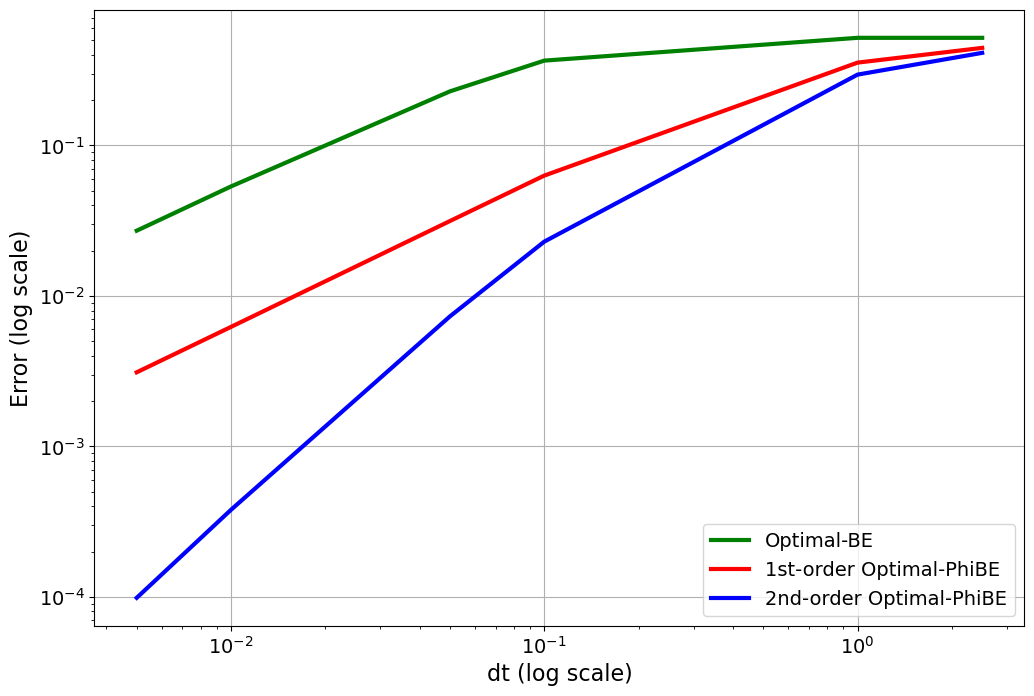

In [33]:
trajectories_RL = V_exact_dist_total_RL[:, :]
trajectories_2nd = V_exact_dist_total_2nd[:, :]
trajectories_1st = V_exact_dist_total_1st[:, :]

trajectories_np_RL = trajectories_RL.numpy()
trajectories_np_2nd = trajectories_2nd.numpy()
trajectories_np_1st = trajectories_1st.numpy()

x_values = [5 * 1e-3, 1e-2, 5 * 1e-2, 1e-1, 1, 2.5]

min_trajectory_RL = trajectories_np_RL.min(axis=0)
max_trajectory_RL = trajectories_np_RL.max(axis=0)
mean_trajectory_RL = trajectories_np_RL.mean(axis=0)

min_trajectory_1st = trajectories_np_1st.min(axis=0)
max_trajectory_1st = trajectories_np_1st.max(axis=0)
mean_trajectory_1st = trajectories_np_1st.mean(axis=0)

min_trajectory_2nd = trajectories_np_2nd.min(axis=0)
max_trajectory_2nd = trajectories_np_2nd.max(axis=0)
mean_trajectory_2nd = trajectories_np_2nd.mean(axis=0)

plt.figure(figsize=(12, 8))

plt.loglog(x_values, mean_trajectory_RL, color='green', linewidth=3, label='Optimal-BE')
plt.loglog(x_values, mean_trajectory_1st, color='red', linewidth=3, label='1st-order Optimal-PhiBE')
plt.loglog(x_values, mean_trajectory_2nd, color='blue', linewidth=3, label='2nd-order Optimal-PhiBE')

plt.xlabel('dt (log scale)', fontsize=16)
plt.ylabel('Error (log scale)', fontsize=16)

plt.legend(fontsize=14)

plt.grid(True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("LQR/dt/dt_2d.eps", format='eps')
plt.show()